## Oppstart

### Preamble

Contains imports and some utility code.

In [1]:
from dhlab.module_update import update, css, code_toggle

In [2]:
import dhlab.graph_networkx_louvain as gnl
import dhlab.nbtext as nb
import networkx as nx
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
css()

In [5]:
def frame_sort(frame, by=0):
    return frame.sort_values(by=by, ascending=False)

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Kollokasjoner eller assosiasjoner

Hvilke ord opptrer et ord sammen med innenfor et korpus? 

### Define a corpus

Bruk gjerne Dewey eller temaord for å definere korpuset, hold det forholdsvis lite rundt 200 bøker.

In [7]:
collword = 'kjærlighet'

In [8]:
korpus = nb.book_urn(words=[collword], ddk='8%', period=(1960, 2020), limit=500)
len(korpus)

500


Kommandoen nb.frame() kan benyttes på en hel del output. Gir en fin oversikt over data, og kan brukes .head() for å se de første eksemplene.



In [9]:
nb.frame(korpus).head(10)

,0,1,2,3
0,2010072308065,"King, Stephen",grønne mil,1997
1,2007033001026,"Hagemann, Sonja",Hjertets geni,1964
2,2014100108104,"Renberg, Tore",Sovende floke,2009
3,2016060108146,"Chase, James Hadley",Siste sjanse,1986
4,2016112348558,"McBain, Ed",Løsepenger,1961
5,2010100708111,"Quinn, Tara Taylor",evige ungkaren,1998
6,2008070800080,"Gulliksen, Geir",Virkelighet og andre essays,1996
7,2008061804020,"Walters, Minette",Det mørke rommet,1996
8,2007051601029,"Kullerud, Erik",Mot stupet,1968
9,2010022500009,"Shukla, Suresh Chandra",Fremmede fugler,1999


In [10]:
nb.urn_concordance(word=collword, urns=korpus)

"grønne mil, King, Stephen, 1997","mine venner , at spesiell",kjærlighet,er bedre enn ingen kjærlighet
"grønne mil, King, Stephen, 1997",kjærlighet er bedre enn ingen,kjærlighet,i det hele tatt .
"Hjertets geni, Hagemann, Sonja, 1964",hjemmet og foreldrene ånder av,kjærlighet,", hengivenhet , ømhet og"
"Hjertets geni, Hagemann, Sonja, 1964",storsinnet . Og Henrik Wergelands,kjærlighet,"og beundring finner , kanskje"
"Hjertets geni, Hagemann, Sonja, 1964",hvordan Wergeland slites mellom sin,kjærlighet,til Carl Johan og sin
"Hjertets geni, Hagemann, Sonja, 1964",å gi uttrykk for sin,kjærlighet,"til kongen , « den"
"Hjertets geni, Hagemann, Sonja, 1964","hus , til a plante",kjærlighet,til Carl Johan inn i
"Sovende floke, Renberg, Tore, 2009",barndom /,kjærlighet,None
"Siste sjanse, Chase, James Hadley, 1986",jeg å tro at min,kjærlighet,til henne også påvirket henne
"Løsepenger, McBain, Ed, 1961","På tro , håp og",kjærlighet,? Hva skal vi gjøre
"Løsepenger, McBain, Ed, 1961",Du vet bare ikke hva,kjærlighet,er . » « Jeg


## Lager kollokasjoner fra korpuset

Et skrittvis eksempel. 
1. Bygg kollokasjonen
2. Finn en referanse
3. Sammenlign kollokasjon med referanse

### Bygg kollokasjon

Kommandoen er `urn_coll()`. Legg gjerne inn en sjekk med konkordans.

Så kan vi hente ut selve kollokasjonen,dvs. ord som står innenfor en viss avstand fra målordet.

In [11]:
small_window = 5
large_window = 10

In [12]:
def collpart(collword, urns, win = 5, limit = 10000):
    return nb.urn_coll(collword, urns = korpus, after = win, before = win, limit = 10000)

Kollokasjonen er en såkalt **dataframe** som kan undersøkes med `.head()` som ovenfor.

In [13]:
small = collpart(collword, nb.pure_urn(korpus), win = 5)
large = collpart(collword, nb.pure_urn(korpus), win = 10)



## Finn referanse

Det er flere måter å sammenligne på. En er å bruke bokhylla selv om som referanse. For å hente ut ord fra bokhylla brukes kommandoen `totals(<antall ord>)`. Korpuset selv kan også benyttes, for eksempel med kommandoen `aggregate_urns(<korpusdefinisjon>)`.



#### Sammenlign

Vi har nå tre frekvenslister som kan sammenlignes med hverandre. For å lette sammenlign normaliseres dem. Kommandoen for normalisering er `normalize_corpus_dataframe(<frekvensliste>)`

nb.normalize_corpus_dataframe(korpus_agg)
nb.normalize_corpus_dataframe(tot)
nb.normalize_corpus_dataframe(small)
nb.normalize_corpus_dataframe(large)

Inspiser dataene etter normalisering

### Kollokasjonen

In [14]:
small.head()

,0
.,2649
",",2436
og,1895
til,972
av,763


In [15]:
large.head()

,0
.,5199
",",4669
og,3127
det,1650
til,1569


Kollokasjonen *coll* har gjennomgående høyere verdier, noe som sannsynligvis skyldes at det er færre ord.

#### Utfør sammenligning

For sammenligning måles forskjellen på *coll* med referansen. Forskjellen måles ved å dividere hvert ords frekvens ikollokasjonen på frekvensen ordet har i referansen.

$$\textrm{assosiasjons-styrke}(w) = \frac{\textrm{coll}(w)}{\textrm{referanse}(w)}$$

Divisjonen pr.ord gjøres av Python - resultat sorteres og legges i variabelen `coll_assoc`

In [16]:
delta = pd.DataFrame()

In [17]:
delta['small'] = small[0]
delta['large'] = large[0]

In [18]:
delta['ratio'] = small[0]/large[0]

In [19]:
#delta['log'] = np.log(delta['ratio'])

In [20]:
#delta['score'] = delta['ratio'] * delta['log']

In [21]:
delta[(delta['small'] > 2) & (delta['ratio'] > 0.6)].sort_values(by='ratio', ascending=False)

,small,large,ratio
innsikt,3,3,1.000000
kvinners,7,7,1.000000
skapt,6,6,1.000000
brus,3,3,1.000000
omhu,6,6,1.000000
...,...,...,...
Hans,40,66,0.606061
og,1895,3127,0.606012
"""",32,53,0.603774
gi,65,108,0.601852


In [22]:
delta.loc[[',','.','og','!', '?']]

,small,large,ratio
",",2436,4669,0.521739
.,2649,5199,0.509521
og,1895,3127,0.606012
!,105,212,0.495283
?,321,584,0.549658


In [23]:
delta_max = delta[delta.small < delta.large][delta.small > 0][delta.ratio > 0.6].sort_values(by='ratio', ascending=False)

In [24]:
delta_const = delta[delta.small > 2][delta.ratio > 0.6].sort_values(by='ratio', ascending=False)

In [25]:
delta_max.head(20)

,small,large,ratio
pinne,18,19,0.947368
Vår,17,18,0.944444
bevis,15,16,0.937500
erklære,14,15,0.933333
snakk,13,14,0.928571
forsoning,12,13,0.923077
århundre,11,12,0.916667
erklært,11,12,0.916667
ømhet,41,45,0.911111
omsorg,40,44,0.909091


In [26]:
delta_const

,small,large,ratio
innsikt,3,3,1.000000
kvinners,7,7,1.000000
skapt,6,6,1.000000
brus,3,3,1.000000
omhu,6,6,1.000000
...,...,...,...
Hans,40,66,0.606061
og,1895,3127,0.606012
"""",32,53,0.603774
gi,65,108,0.601852


In [27]:
delta_max.head(50).index

Index(['pinne', 'Vår', 'bevis', 'erklære', 'snakk', 'forsoning', 'århundre',
       'erklært', 'ømhet', 'omsorg', 'mangel', 'bølge', 'livs', '©',
       'trygghet', 'blanding', 'erklærte', 'nærer', 'omtanke', 'romantikk',
       'dør', 'betingelsesløs', 'mat', 'kvinnes', 'sånt', 'manns', '~',
       'musikk', 'blind', 'menneskers', 'brennende', 'virkelige', 'ofret',
       'Ekte', 'krig', 'kaller', 'sann', 'takknemlighet', 'Bøker', 'manglet',
       'sterkere', 'tragisk', 'bønn', 'Kristi', 'lesbisk', 'forstått', 'Beate',
       'menneskes', 'riktige', 'gjensidig'],
      dtype='object')

In [28]:
delta_const.head(50).index

Index(['innsikt', 'kvinners', 'skapt', 'brus', 'omhu', 'faderlig', 'uselvisk',
       'udødelige', 'bevise', 'sjelden', 'istedenfor', 'ismael', 'brant',
       'englenes', 'rikelig', 'blottet', 'Folk', 'intens', 'sikre', 'synger',
       'bekrefte', 'overveldet', 'Krig', 'besvare', 'tålmodighet', '43',
       'religionen', 'trofaste', 'bunnen', 'barndoms', 'ethvert', 'uttrykt',
       'ret', 'Alltid', '&', 'eksotiske', 'barns', '•', 'roper', 'barndom',
       'barnas', 'livslang', 'barmhjertighet', 'partenes', 'plante', '<',
       'prisen', 'forbudte', 'mislykket', 'begrep'],
      dtype='object')

# Visualiser med en ordsky


Visualiseringen trives best med tall mellom 0 og 1, så assosiasjonene divideres på summen av dem for å få til det. Ordskyene lages med kommonandoen `cloud(<data>)`. Pass på å ikke ta med alt for mange; det kan gi feilsituasjoner.

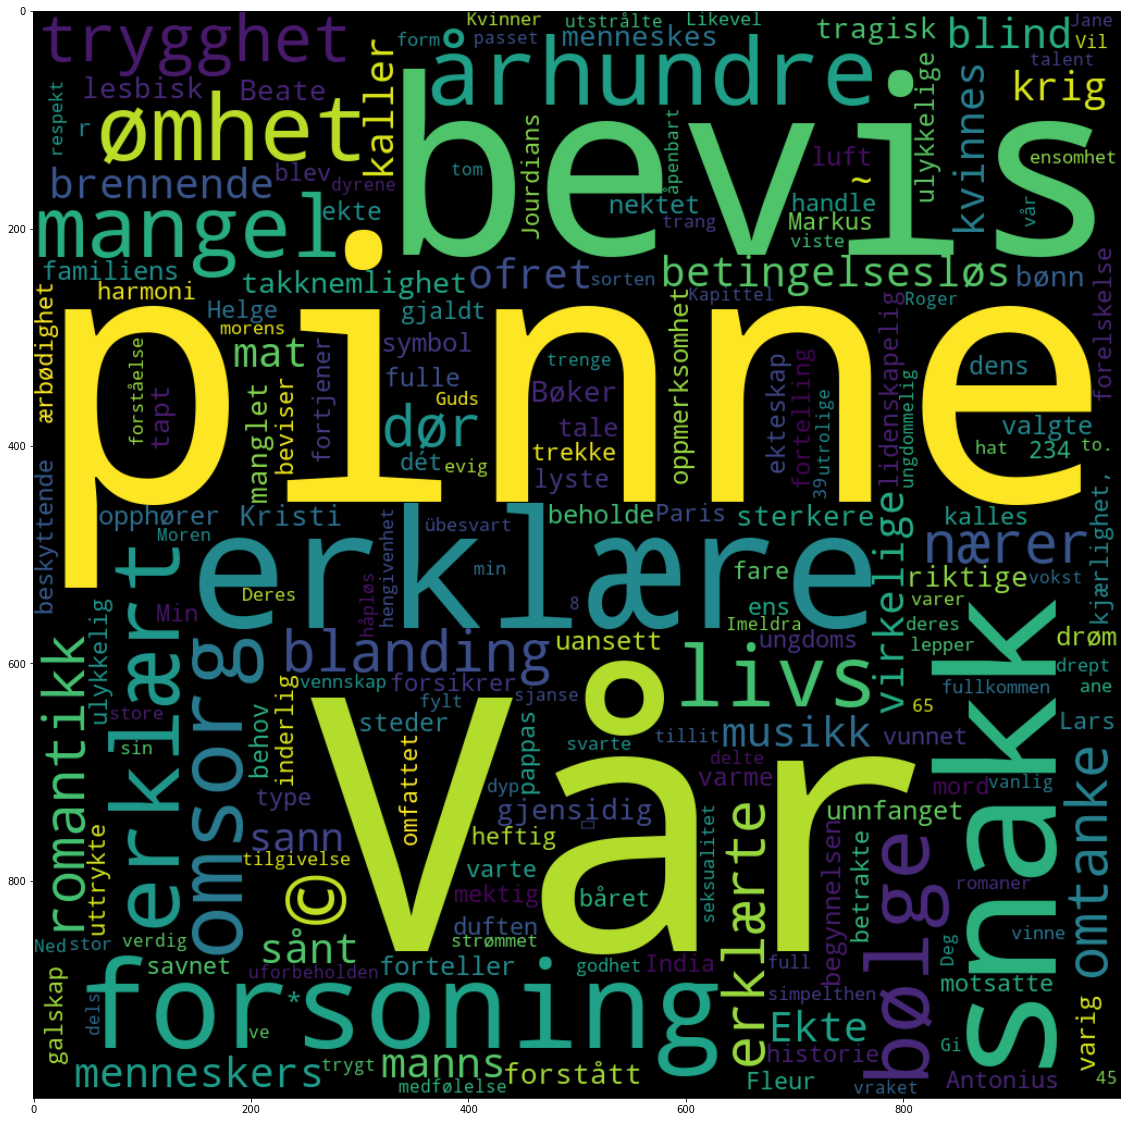

In [29]:
nb.cloud(nb.frame(delta_max.ratio))

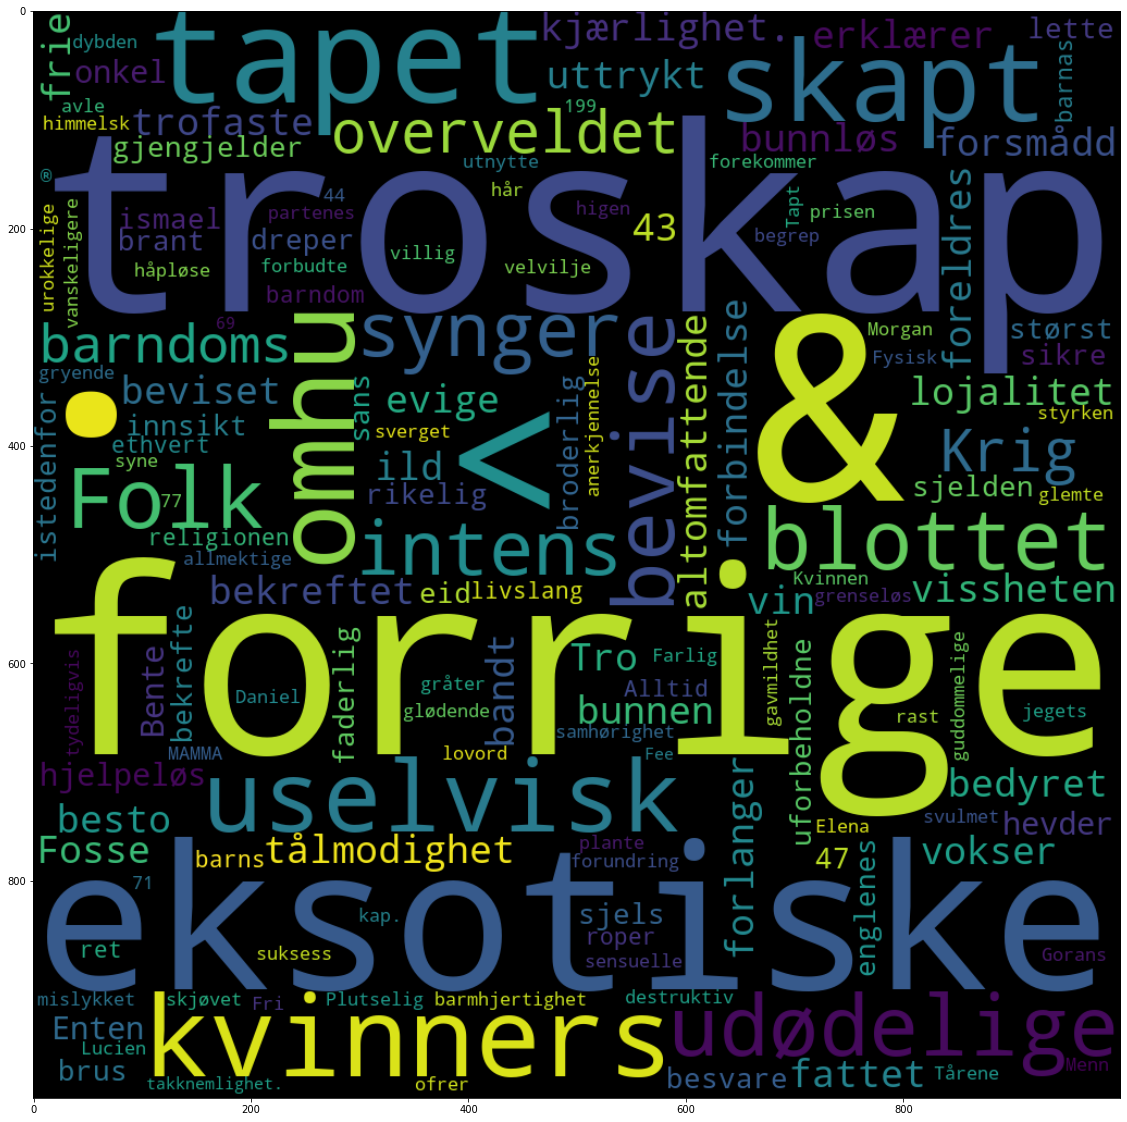

In [30]:
nb.cloud(nb.frame(delta_const.head(150).small/delta_const.small.sum()))